In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Conv2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers


%matplotlib inline
pd.options.display.max_columns = None

fixed acidity: 酒石酸濃度
volatile acidity: 酢酸濃度
citric acid: クエン酸濃度
residual sugar: 残糖濃度
chlorides: 塩化ナトリウム濃度
free sulfur dioxide: 遊離SO2（二酸化硫黄）濃度
total sulfur dioxide:総SO2（二酸化硫黄）濃度
density: 密度
pH: 水素イオン濃度
sulphates: 硫化カリウム濃度
alcohol: アルコール度数
quality: 評価

In [76]:
wine = pd.read_csv("wine.csv")
wine.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [77]:
# sep=";", header=0を入れる事で1行にまとまっていた数値を各列に移し替えることが出来る

wine = pd.read_csv("wine.csv", sep=";",header=0) 
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [78]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [79]:
print(wine.shape)

(1599, 12)


In [80]:
X = wine[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "density", "pH", "sulphates", "quality"]]
Y = wine["quality"]

In [81]:
print(X.shape)
print(Y.shape)

(1599, 9)
(1599,)


In [82]:
Y2 = to_categorical(Y)
Y2.shape

(1599, 9)

In [83]:
print(X.shape)
print(Y2.shape)

(1599, 9)
(1599, 9)


In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y2, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid= train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [85]:
print("Y_train=", Y_train.shape, "X_train=", X_train.shape)
print("Y_test=", Y_test.shape, "X_test=", X_test.shape)
print("Y_valid=", Y_valid.shape, "X_valid=", X_valid.shape)

Y_train= (783, 9) X_train= (783, 9)
Y_test= (480, 9) X_test= (480, 9)
Y_valid= (336, 9) X_valid= (336, 9)


In [86]:
model = keras.Sequential()

model.add(Dense(128, activation='relu', input_shape=(9, )))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(16, activation='relu'))

model.add(Dense(9, activation='sigmoid'))

model.compile(optimizer = "rmsprop", loss='binary_crossentropy', metrics=['accuracy'])

In [87]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               1280      
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_16 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_17 (Dense)             (None, 9)                 153       
Total params: 12,297
Trainable params: 12,297
Non-trainable params: 0
_________________________________________________________________


In [88]:
%%time

log = model.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=True,
                callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1)],
               validation_data=(X_valid, Y_valid))

Epoch 1/100
25/25 [==============================] - 0s 9ms/step - loss: 0.3141 - accuracy: 0.2989 - val_loss: 0.2323 - val_accuracy: 0.3899
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2264 - accuracy: 0.4457 - val_loss: 0.2188 - val_accuracy: 0.4345
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2175 - accuracy: 0.4636 - val_loss: 0.2154 - val_accuracy: 0.3958
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2110 - accuracy: 0.5428 - val_loss: 0.2109 - val_accuracy: 0.4345
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2078 - accuracy: 0.5338 - val_loss: 0.2012 - val_accuracy: 0.6339
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1979 - accuracy: 0.6079 - val_loss: 0.1879 - val_accuracy: 0.7500
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1902 - accuracy: 0.6373 - val_loss: 0.1809 - val_accuracy: 0.6994
Epoch 8/100
2

Epoch 59/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.9911 - val_loss: 0.0147 - val_accuracy: 0.9851
Epoch 60/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.9655 - val_loss: 0.0066 - val_accuracy: 0.9940
Epoch 61/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 0.9936 - val_loss: 0.0071 - val_accuracy: 0.9911
Epoch 62/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.9681 - val_loss: 0.0058 - val_accuracy: 0.9940
Epoch 63/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.9936 - val_loss: 0.0066 - val_accuracy: 0.9911
Epoch 64/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9642 - val_loss: 0.0056 - val_accuracy: 0.9940
Epoch 65/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 0.9936 - val_loss: 0.0053 - val_accuracy: 0.9940
Epoch 

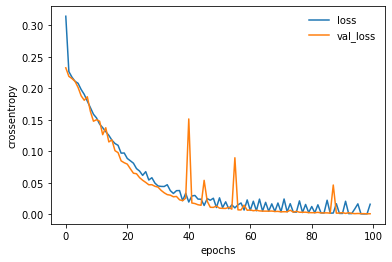

In [89]:
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False)
plt.xlabel("epochs")
plt.ylabel("crossentropy")
plt.show()

In [90]:
# 予測
Y_pred = np.argmax(model.predict(X_test), axis=1)
Y_pred

array([6, 5, 7, 6, 5, 6, 5, 6, 4, 5, 5, 5, 6, 5, 6, 6, 7, 5, 5, 4, 7, 6,
       6, 5, 6, 5, 5, 7, 5, 6, 5, 6, 5, 6, 7, 7, 5, 6, 6, 7, 5, 7, 6, 6,
       5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 6, 6, 6, 6, 4, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 5, 5, 6, 4, 5, 7, 6, 6, 5, 6, 5, 8, 6, 6, 6, 5, 5, 5, 5, 7, 5,
       6, 5, 7, 5, 6, 6, 6, 7, 6, 6, 5, 7, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6,
       6, 6, 6, 5, 6, 5, 8, 5, 6, 5, 6, 5, 4, 6, 7, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 3, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 8, 5, 6,
       6, 7, 7, 5, 5, 7, 5, 6, 6, 4, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 7, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 6, 3, 6, 5, 5, 7, 6, 7, 6, 6, 7, 7, 6, 5, 6,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 7, 5, 6, 5, 6,
       5, 4, 5, 5, 6, 7, 6, 5, 5, 4, 5, 6, 7, 6, 6, 7, 5, 7, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6,

In [91]:
# カテゴリー変数の復元
Y_test_ = np.argmax(Y_test, axis=1)
Y_test_

array([6, 5, 7, 6, 5, 6, 5, 6, 4, 5, 5, 5, 6, 5, 6, 6, 7, 5, 5, 4, 7, 6,
       6, 4, 6, 5, 5, 7, 5, 6, 5, 6, 5, 6, 7, 7, 5, 6, 6, 7, 5, 7, 6, 6,
       5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 6, 6, 6, 6, 4, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 5, 5, 6, 4, 5, 7, 6, 6, 5, 6, 5, 8, 6, 6, 6, 5, 5, 5, 5, 7, 5,
       6, 5, 7, 5, 6, 6, 6, 7, 6, 6, 5, 7, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6,
       6, 6, 6, 5, 6, 5, 8, 5, 6, 5, 6, 5, 4, 6, 7, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 3, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 8, 5, 6,
       6, 7, 7, 5, 5, 7, 5, 6, 6, 4, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 7, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 6, 3, 6, 5, 5, 7, 6, 7, 6, 6, 7, 7, 6, 5, 6,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 7, 5, 6, 5, 6,
       5, 4, 5, 5, 6, 7, 6, 5, 5, 4, 5, 6, 7, 6, 6, 7, 5, 7, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6,

In [92]:
from sklearn.metrics import classification_report

print(classification_report(Y_test_, Y_pred))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         3
           4       1.00      0.93      0.97        15
           5       1.00      1.00      1.00       208
           6       1.00      1.00      1.00       204
           7       1.00      1.00      1.00        45
           8       1.00      1.00      1.00         5

    accuracy                           1.00       480
   macro avg       1.00      0.99      0.99       480
weighted avg       1.00      1.00      1.00       480



In [74]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true=Y_test_, y_pred=Y_pred)
print("予測率:", accuracy*100, "%")

予測率: 99.58333333333333 %
